# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

*Скрипт находится в sputnik_parser.py*

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [21]:
data = pd.read_csv('messages.csv', names=['date', 'message']).dropna()
date_info = pd.DataFrame(list(data['date'].str.split()), columns=['date', 'time'])

In [22]:
data

,date,message
0,2023-01-13 09:00:00+00:00,Народные отчеты о вакцинации\n\n⚠️ ТОЛЬКО ПУБЛ...
1,2023-01-10 17:53:46+00:00,В этом можно только публиковать отчёты.\nЕсли ...
2,2023-01-10 17:42:01+00:00,"Здравствуйте \nПодскажите пожалуйста, куда нап..."
3,2023-01-09 06:30:00+00:00,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
4,2023-01-02 06:30:00+00:00,📣 ВЕСТНИК V1V2.ru выпуск #70 от 09.12.2022@09:...
...,...,...
1486,2021-11-29 20:58:31+00:00,М30 (на момент первой прививки 29).\nДо вакцин...
1496,2021-11-29 20:20:11+00:00,"Ж41, до вакцинации не болела, отриц. антитела ..."
1497,2021-11-29 19:58:05+00:00,М. 23 года. Хронических заболеваний нет. Была ...
1498,2021-11-29 17:09:23+00:00,"Да, сейчас прохожу все анализы"


In [23]:
date_info

,date,time
0,2023-01-13,09:00:00+00:00
1,2023-01-10,17:53:46+00:00
2,2023-01-10,17:42:01+00:00
3,2023-01-09,06:30:00+00:00
4,2023-01-02,06:30:00+00:00
...,...,...
1401,2021-11-29,20:58:31+00:00
1402,2021-11-29,20:20:11+00:00
1403,2021-11-29,19:58:05+00:00
1404,2021-11-29,17:09:23+00:00


График зависимости числа сообщений от даты

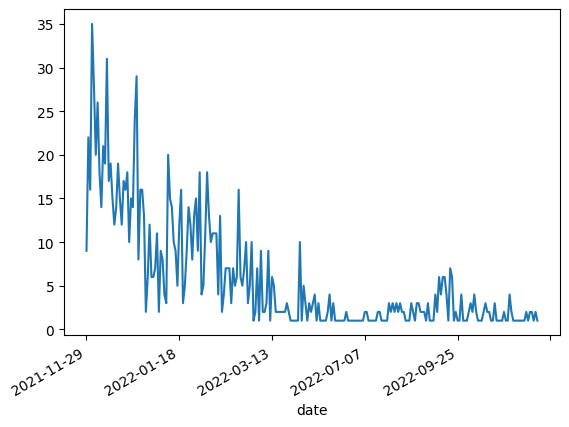

In [24]:
date_info.groupby('date').size().plot()

plt.gcf().autofmt_xdate()

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

In [25]:
def sender_info(data):
    # оставляем сообщения, где указан пол и возраст (смотрим наличие цифр, далее будем смотреть непосредственно возраст)
    data = data[data['message'].str.contains('Ж|М|м|ж')]
    data = data[data['message'].str.contains('[0-9]')]
    
    data['personal_info'] = data['message'].str.extract('([МЖмж].[0-9].)')
    data['personal_info'] = data['personal_info'].str.upper()
    
    data['gender'] = data['personal_info'].str.extract('([МЖмж])')
    data['age'] = data['personal_info'].str.extract('([0-9][0-9])')
    data = data.drop('personal_info', axis=1)
    data = data.dropna()
    return data

In [26]:
data = sender_info(data)

In [27]:
data

,date,message,gender,age
7,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник\n\nЖ53, ковидом не б...",Ж,53
11,2022-12-25 11:24:02+00:00,#назально #ревак #спутник-V\nМ33. 1 комп.: лег...,М,33
13,2022-12-19 14:35:43+00:00,#назально #ревак. Ж35. Хр. Заболевания: полива...,Ж,35
15,2022-12-12 23:10:46+00:00,#дети\nМ 13 лет. спутник м. \n1я доза 23.10.2...,М,13
16,2022-12-09 07:23:43+00:00,#ревак #назально #спутник \nМ 49 вторая доза...,М,49
...,...,...,...,...
1476,2021-11-30 06:16:41+00:00,М 37 первая вакцина 28.11 в первый вечер все н...,М,37
1479,2021-11-30 04:19:04+00:00,"Ж 86 лет, пишу за маму, ковидои не болела, гип...",Ж,86
1485,2021-11-29 21:50:11+00:00,"Добрый ночи, всем! \nДрузья кто болел после ре...",Ж,53
1486,2021-11-29 20:58:31+00:00,М30 (на момент первой прививки 29).\nДо вакцин...,М,30


Число прививок в зависимости от возраста

<AxesSubplot: xlabel='age'>

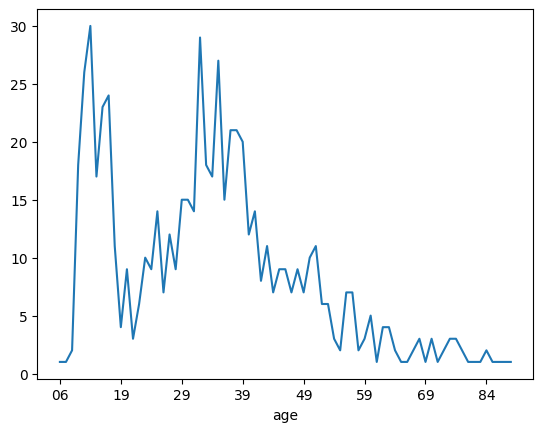

In [28]:
data.groupby(['age']).size().plot()

Число прививок в зависимости от пола

<AxesSubplot: >

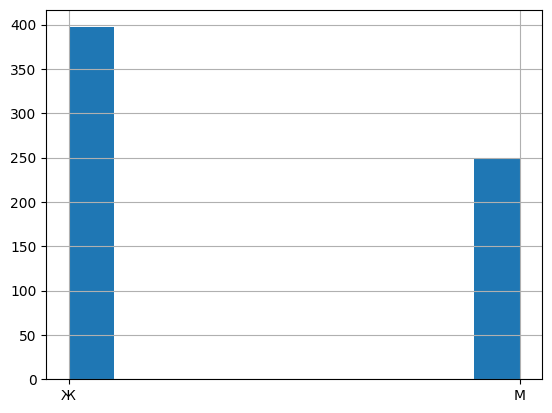

In [29]:
data['gender'].hist()

Число прививок в зависимости от возраста и пола

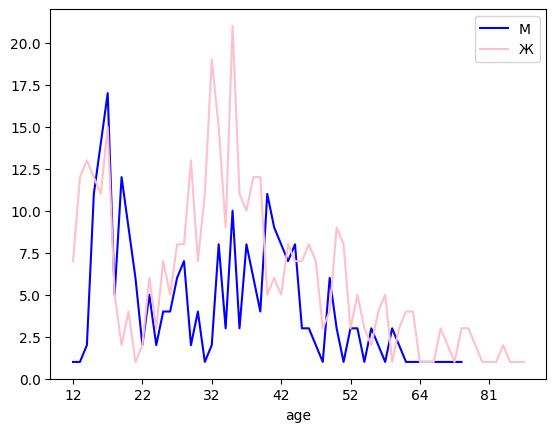

In [30]:
data_for_plot = data.groupby(['gender','age']).size()
data_for_plot['М'].plot(color='blue')
data_for_plot['Ж'].plot(color='pink')
plt.legend(['М', 'Ж'])
plt.show()

Зависимость числа болеющих гипертонией от возраста

<AxesSubplot: xlabel='age'>

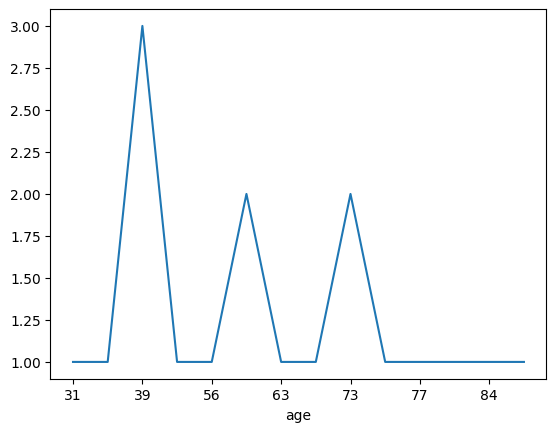

In [31]:
data_hyst = data[data['message'].str.contains('гипертония')]
data_hyst.groupby('age').size().plot()

Как видно из предыдущего графика, наибольшее число людей, болеющих гипертонией, находятся приблизительно в пределах от 50 до 70 лет. Посмотрим соотношение числа людей с гипертонией ко всем людям, написавшим сообщение в канал.

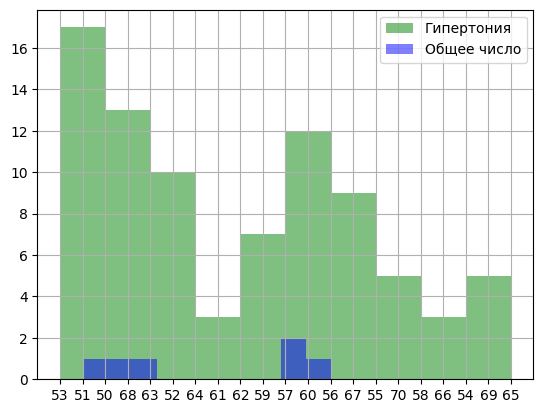

In [32]:
data_hyst = data_hyst[data_hyst['age'].astype(int).between(50, 70)]
data_50_70 = data[data['age'].astype(int).between(50, 70)]

data_50_70['age'].hist(color='green', alpha=0.5)
data_hyst['age'].hist(color='blue', alpha=0.5)
plt.legend(['Гипертония', 'Общее число'])

Зависимость числа антител от возраста

In [33]:
data = data[data['message'].str.contains('bau|BAU')]
data['BAU'] = data['message'].str.extract('(...[0-9.,][0-9][0-9].bau)', flags=re.IGNORECASE, expand=False).str.upper()
data['BAU'] = data['BAU'].str.replace(' BAU', '')
data['BAU'] = data['BAU'].str.replace(',', '.')
data['BAU'] = data['BAU'].str.replace('.[0-9][.]', '')
data['BAU'] = data['BAU'].str.replace('(\D)', '')
data['BAU'] = pd.to_numeric(data['BAU'], errors='ignore')

data = data.dropna()

/var/folders/ys/wwxc441n4t17tmtzbxygcnxh0000gn/T/ipykernel_1098/118204072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BAU'] = data['message'].str.extract('(...[0-9.,][0-9][0-9].bau)', flags=re.IGNORECASE, expand=False).str.upper()
/var/folders/ys/wwxc441n4t17tmtzbxygcnxh0000gn/T/ipykernel_1098/118204072.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BAU'] = data['BAU'].str.replace(' BAU', '')
/var/folders/ys/wwxc441n4t17tmtzbxygcnxh0000gn/T/ipykernel_1098/118204072.py:4: SettingWith

<AxesSubplot: >

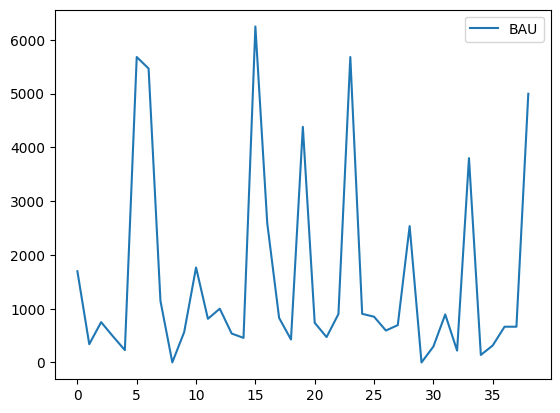

In [34]:
data.groupby(['age'])['BAU'].mean().reset_index().plot()